# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


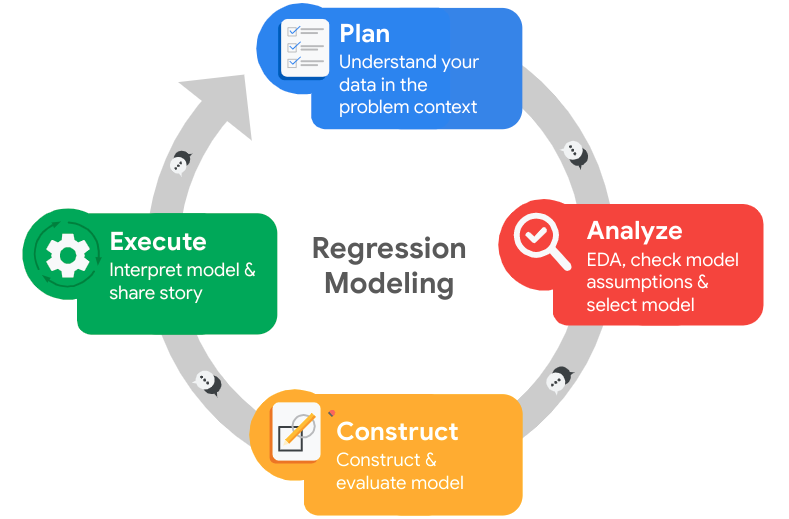

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [93]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df = pd.read_csv(r"C:\Users\Hoyeon Kang\Desktop\SCM516_Intro to Predictv Modeling\HR_comma_sep.csv")


# Display first few rows of the dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data

df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed

df.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'num_projects',
    'average_montly_hours': 'avg_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'left': 'left',
    'promotion_last_5years': 'promoted_last_5yrs',
    'Department': 'department'
}, inplace=True)

# Display all column names after the update

print(df.columns)

Index(['satisfaction', 'evaluation', 'num_projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'left', 'promoted_last_5yrs', 'department',
       'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values

df.isnull().sum()

satisfaction          0
evaluation            0
num_projects          0
avg_monthly_hours     0
tenure                0
work_accident         0
left                  0
promoted_last_5yrs    0
department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates

print(df.shape)
print(df.drop_duplicates().shape)

(14999, 10)
(11991, 10)


In [12]:
# Inspect some rows containing duplicates as needed

df_duplicated = df[df.duplicated() == True]
df_duplicated

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left,promoted_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [14]:
df_duplicated['left'].value_counts()

1    1580
0    1428
Name: left, dtype: int64

In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df = df.drop_duplicates()
df.reset_index(inplace = True, drop = True)

# Display first few rows of new dataframe as needed

df.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left,promoted_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction        11991 non-null  float64
 1   evaluation          11991 non-null  float64
 2   num_projects        11991 non-null  int64  
 3   avg_monthly_hours   11991 non-null  int64  
 4   tenure              11991 non-null  int64  
 5   work_accident       11991 non-null  int64  
 6   left                11991 non-null  int64  
 7   promoted_last_5yrs  11991 non-null  int64  
 8   department          11991 non-null  object 
 9   salary              11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Check outliers

Check for outliers in the data.

In [23]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

fig = px.box(df, y='tenure')
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.update_yaxes(showgrid=False)
fig.show()

In [24]:
# Determine the number of rows containing outliers


tenure_iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)
tenure_upper_limit = df['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df['tenure'].quantile(0.25) - 1.5 * tenure_iqr

df.loc[(df['tenure'] > tenure_upper_limit) | (df['tenure'] < tenure_lower_limit)]

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left,promoted_last_5yrs,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [25]:
# Get numbers of people who left vs. stayed

print(df['left'].value_counts())

# Get percentages of people who left vs. stayed

total_people = df['left'].count()
left_percentage = (df['left'].sum() / total_people) * 100
stayed_percentage = 100 - left_percentage

print(f"Percentage of people who left: {left_percentage:.2f}%")
print(f"Percentage of people who stayed: {stayed_percentage:.2f}%")

0    10000
1     1991
Name: left, dtype: int64
Percentage of people who left: 16.60%
Percentage of people who stayed: 83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

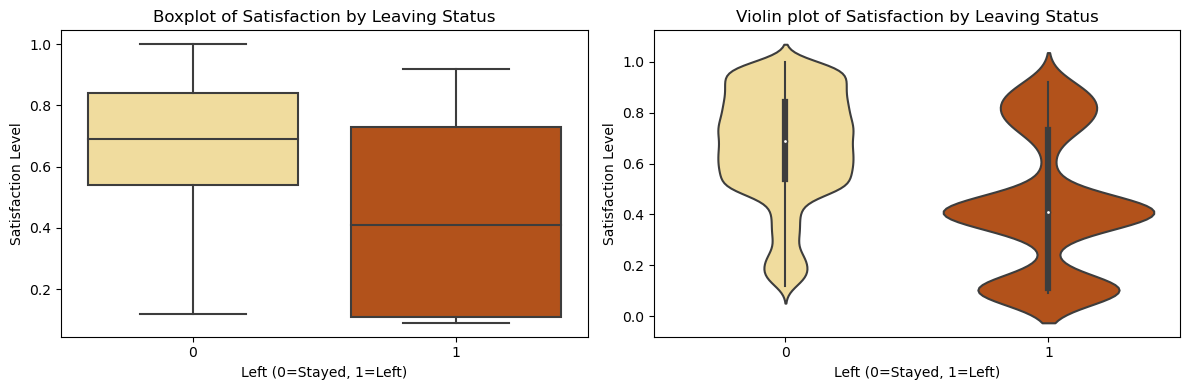

In [38]:
# Create a plot as needed

### Relationship between 'satisfaction level' and 'left' columns

colors_earth_distinct = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot on the first axis
sns.boxplot(data=df, x='left', y='satisfaction', showfliers=False, ax=axes[0], palette=colors_earth_distinct)  # Exclude the outliers
axes[0].set_title('Boxplot of Satisfaction by Leaving Status')
axes[0].set_xlabel('Left (0=Stayed, 1=Left)')
axes[0].set_ylabel('Satisfaction Level')

# Violin plot on the second axis
sns.violinplot(x='left', y='satisfaction', data=df, split=True, ax=axes[1], palette=colors_earth_distinct)
axes[1].set_title('Violin plot of Satisfaction by Leaving Status')
axes[1].set_xlabel('Left (0=Stayed, 1=Left)')
axes[1].set_ylabel('Satisfaction Level')

plt.tight_layout()
plt.show()

C:\Users\Hoyeon Kang\AppData\Local\Temp\ipykernel_208\2389483963.py:6: UserWarning:


The palette list has fewer values (7) than needed (92) and will cycle, which may produce an uninterpretable plot.



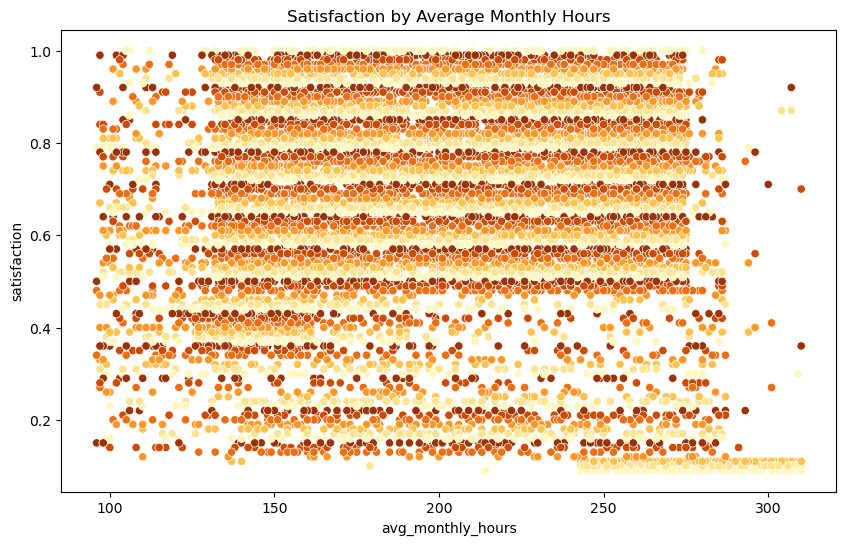

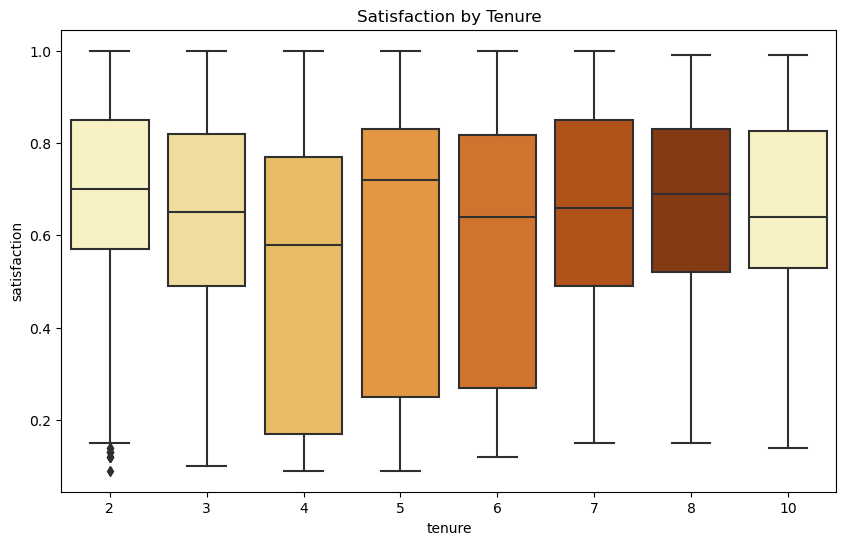

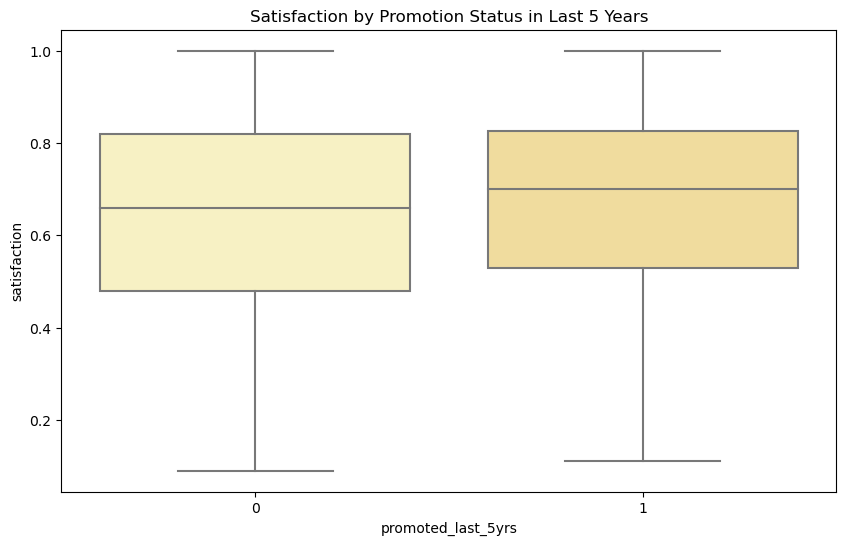

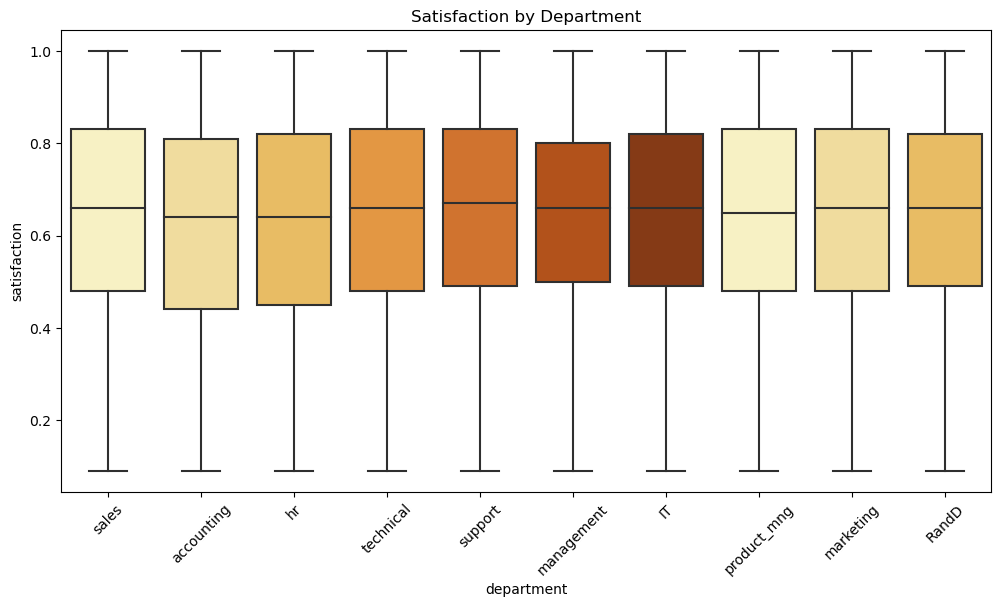

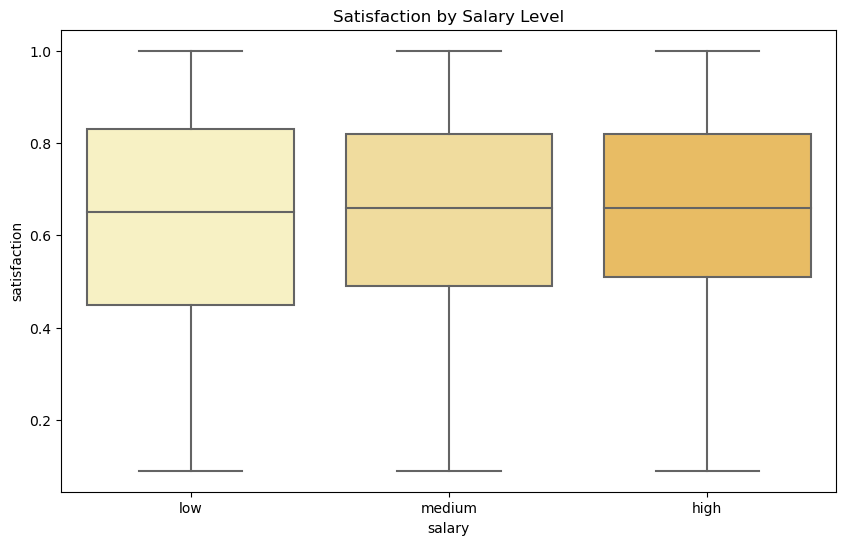

In [29]:
# Custom earth tone palette
earth_palette = sns.color_palette("YlOrBr", n_colors=7)

# 1. by avg_monthly_hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_monthly_hours', y='satisfaction', data=df, hue='satisfaction', palette=earth_palette, legend=False)
plt.title('Satisfaction by Average Monthly Hours')
plt.show()

# 2. by tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure', y='satisfaction', data=df, palette=earth_palette)
plt.title('Satisfaction by Tenure')
plt.show()

# 3. by promoted_last_5yrs
plt.figure(figsize=(10, 6))
sns.boxplot(x='promoted_last_5yrs', y='satisfaction', data=df, palette=earth_palette)
plt.title('Satisfaction by Promotion Status in Last 5 Years')
plt.show()

# 4. by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='satisfaction', data=df, palette=earth_palette)
plt.title('Satisfaction by Department')
plt.xticks(rotation=45)
plt.show()

# 5. by salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='satisfaction', data=df, order=['low', 'medium', 'high'], palette=earth_palette)
plt.title('Satisfaction by Salary Level')
plt.show()

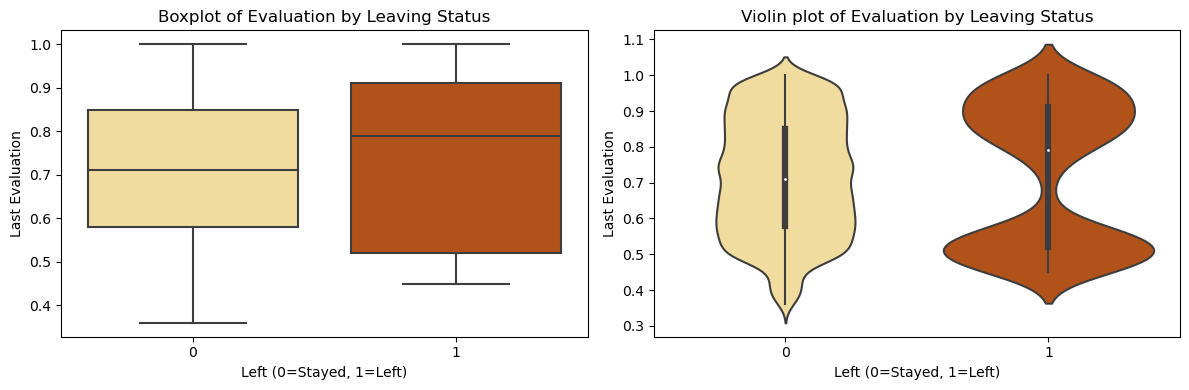

In [41]:
colors_earth_muted = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

# Create a plot as needed

### Relationship between 'evaluation' and 'left' columns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot on the first axis
sns.boxplot(data=df, x='left', y='evaluation', showfliers=False, ax=axes[0], palette=colors_earth_muted)  # Exclude the outliers
axes[0].set_title('Boxplot of Evaluation by Leaving Status')
axes[0].set_xlabel('Left (0=Stayed, 1=Left)')
axes[0].set_ylabel('Last Evaluation')

# Violin plot on the second axis
sns.violinplot(x='left', y='evaluation', data=df, split=True, ax=axes[1], palette=colors_earth_muted)
axes[1].set_title('Violin plot of Evaluation by Leaving Status')
axes[1].set_xlabel('Left (0=Stayed, 1=Left)')
axes[1].set_ylabel('Last Evaluation')

plt.tight_layout()
plt.show()

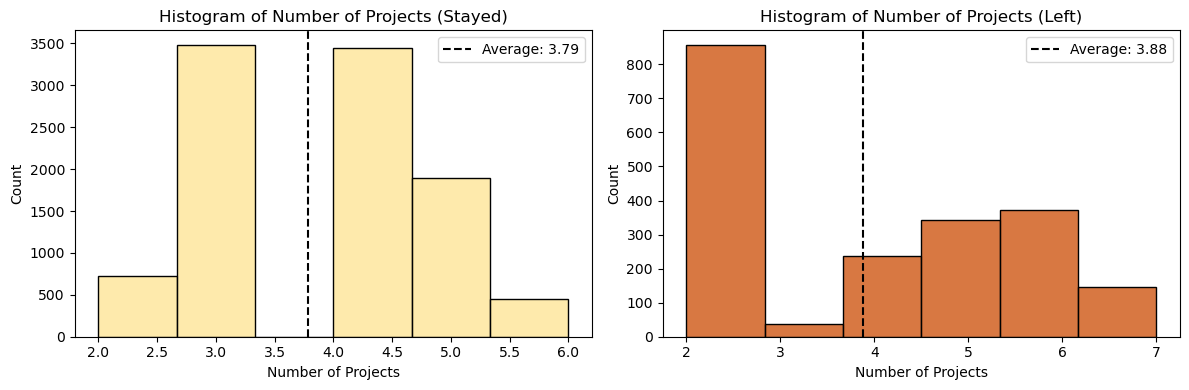

In [43]:
colors_earth_muted = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Calculate means
mean_stayed = df[df['left'] == 0]['num_projects'].mean()
mean_left = df[df['left'] == 1]['num_projects'].mean()

# Histogram for those who stayed
sns.histplot(df[df['left'] == 0]['num_projects'], bins=6, ax=axes[0], kde=False, color=colors_earth_muted[0])
axes[0].axvline(mean_stayed, color='black', linestyle='--', label=f'Average: {mean_stayed:.2f}')
axes[0].set_title('Histogram of Number of Projects (Stayed)')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Count')
axes[0].legend()

# Histogram for those who left
sns.histplot(df[df['left'] == 1]['num_projects'], bins=6, ax=axes[1], kde=False, color=colors_earth_muted[1])
axes[1].axvline(mean_left, color='black', linestyle='--', label=f'Average: {mean_left:.2f}')
axes[1].set_title('Histogram of Number of Projects (Left)')
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

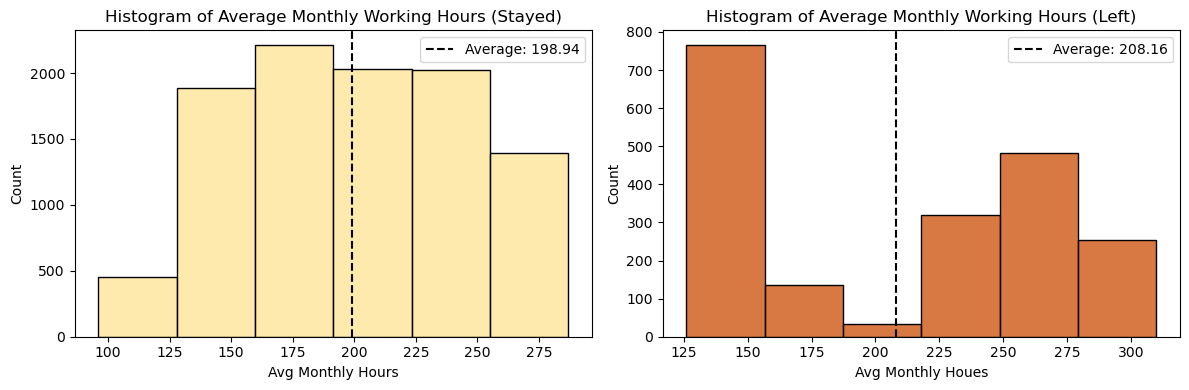

In [44]:
colors_earth_muted = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Calculate means
mean_stayed = df[df['left'] == 0]['avg_monthly_hours'].mean()
mean_left = df[df['left'] == 1]['avg_monthly_hours'].mean()

# Histogram for those who stayed
sns.histplot(df[df['left'] == 0]['avg_monthly_hours'], bins=6, ax=axes[0], kde=False, color=colors_earth_muted[0])
axes[0].axvline(mean_stayed, color='black', linestyle='--', label=f'Average: {mean_stayed:.2f}')
axes[0].set_title('Histogram of Average Monthly Working Hours (Stayed)')
axes[0].set_xlabel('Avg Monthly Hours')
axes[0].set_ylabel('Count')
axes[0].legend()

# Histogram for those who left
sns.histplot(df[df['left'] == 1]['avg_monthly_hours'], bins=6, ax=axes[1], kde=False, color=colors_earth_muted[1])
axes[1].axvline(mean_left, color='black', linestyle='--', label=f'Average: {mean_left:.2f}')
axes[1].set_title('Histogram of Average Monthly Working Hours (Left)')
axes[1].set_xlabel('Avg Monthly Houes')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

    - 

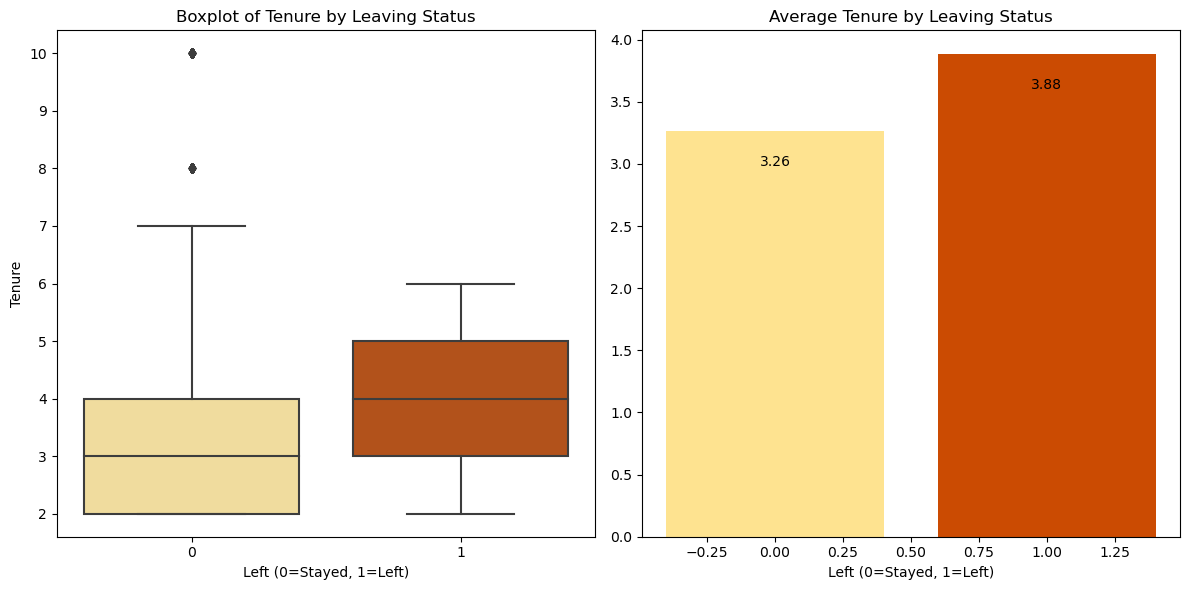

In [49]:
colors_earth_muted = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

### Relationship between 'time_spend_company' and 'left' columns

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for comparing tenure by `left` status
sns.boxplot(data=df, x='left', y='tenure', ax=axes[0], palette=colors_earth_muted)
axes[0].set_title('Boxplot of Tenure by Leaving Status')
axes[0].set_xlabel('Left (0=Stayed, 1=Left)')
axes[0].set_ylabel('Tenure')

# Barplot with labels
avg_tenure = df.groupby('left')['tenure'].mean()
bars = axes[1].bar(avg_tenure.index, avg_tenure.values, color=colors_earth_muted)
axes[1].set_title('Average Tenure by Leaving Status')
axes[1].set_xlabel('Left (0=Stayed, 1=Left)')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval - 0.3, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

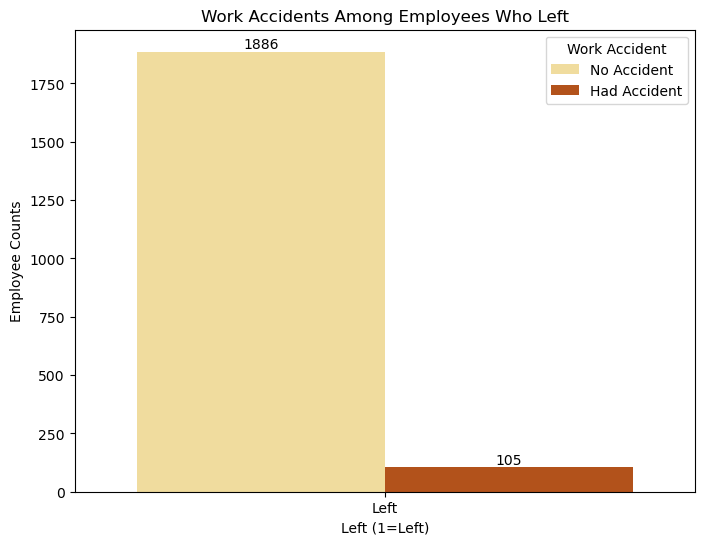

In [50]:
olors_earth_muted = [sns.color_palette("YlOrBr", n_colors=7)[1], sns.color_palette("YlOrBr", n_colors=7)[-2]]

plt.figure(figsize=(8, 6))

# Set the color palette to your custom palette
sns.set_palette(colors_earth_muted)

# Use countplot to get counts of accidents and no accidents for each 'left' category
sns.countplot(data=df[df['left'] == 1], x='left', hue='work_accident')

plt.title('Work Accidents Among Employees Who Left')
plt.xlabel('Left (1=Left)')
plt.ylabel('Employee Counts')
plt.legend(title='Work Accident', labels=['No Accident', 'Had Accident'])
plt.xticks([0], ['Left'])  # Adjusted x-tick labels for clarity

# Annotating bars with their respective counts
n = len(plt.gca().patches) // 2
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2,
                   height + 30,
                   int(height),
                   ha='center',
                   va='center',
                   color='black',
                   fontsize=10)

plt.show()

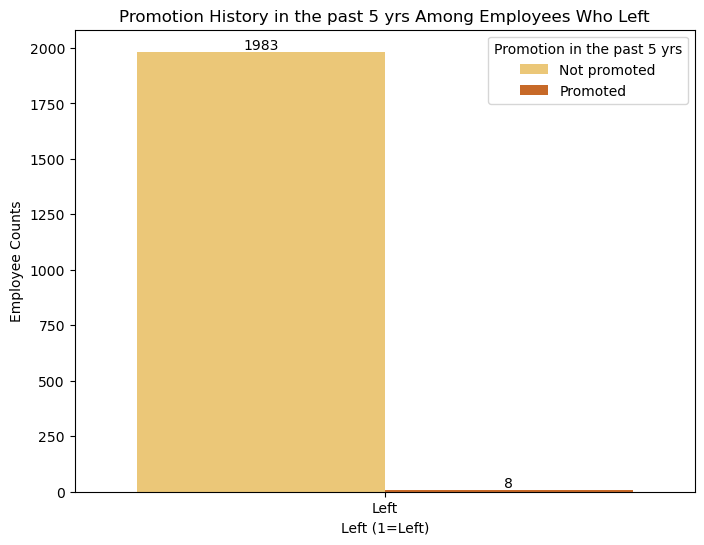

In [51]:
earth_palette = sns.color_palette("YlOrBr", n_colors=2)

plt.figure(figsize=(8, 6))

# Use countplot to get counts of promotions in the past 5 years for each 'left' category
sns.countplot(data=df[df['left'] == 1], x='left', hue='promoted_last_5yrs', palette=earth_palette)

plt.title('Promotion History in the past 5 yrs Among Employees Who Left')
plt.xlabel('Left (1=Left)')
plt.ylabel('Employee Counts')
plt.legend(title='Promotion in the past 5 yrs', labels=['Not promoted', 'Promoted'])
plt.xticks([0], ['Left'])

# Annotating bars with their respective counts
n = len(plt.gca().patches) // 2
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2,
                   height + 30, 
                   int(height),
                   ha='center',
                   va='center',
                   color='black',
                   fontsize=10)
    
plt.show()

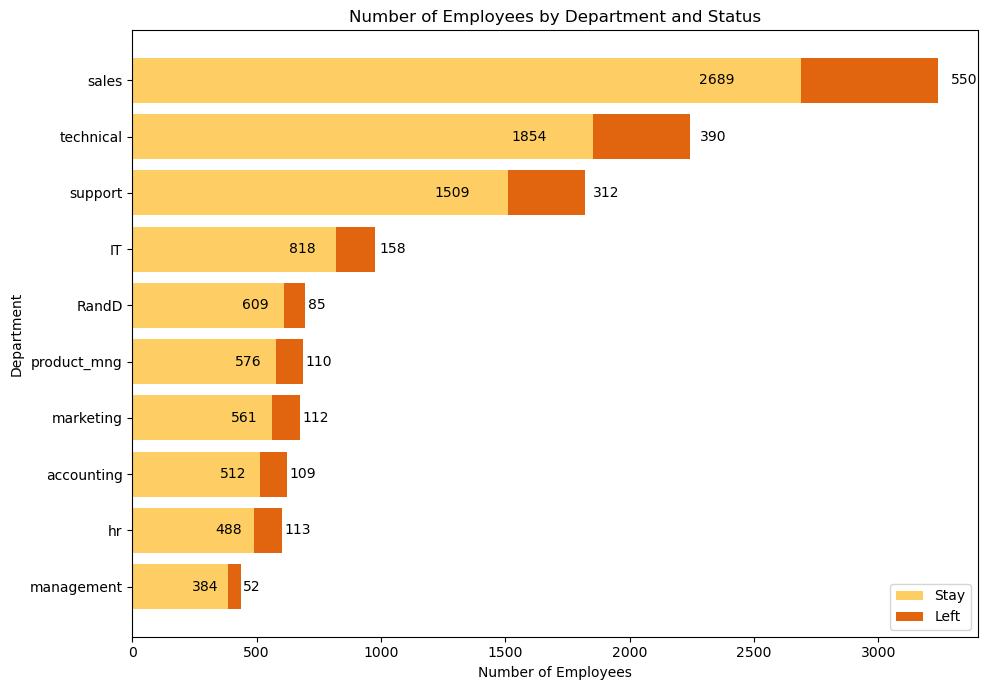

In [52]:
stay_counts = df[df['left'] == 0].groupby('department').size()
left_counts = df[df['left'] == 1].groupby('department').size()

# Descendind order
total_counts = stay_counts + left_counts
sorted_departments = total_counts.sort_values().index

stay_counts = stay_counts[sorted_departments]
left_counts = left_counts[sorted_departments]

# Create stacked bar chart
plt.figure(figsize=(10, 7))

# Earth tones for the bars
colors_earth = sns.color_palette("YlOrBr", n_colors=2)

bottom_bars = plt.barh(stay_counts.index, stay_counts.values, label='Stay', color=colors_earth[0])
top_bars = plt.barh(left_counts.index, left_counts.values, label='Left', color=colors_earth[1], left=stay_counts.values)

plt.title('Number of Employees by Department and Status')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.legend()

# Annotating bars with their respective counts
for i, bar in enumerate(bottom_bars):
    plt.text(bar.get_width() - (bar.get_width() * 0.1), bar.get_y() + bar.get_height()/2, 
             str(stay_counts.values[i]), va='center', ha='right', color='black')

for i, bar in enumerate(top_bars):
    plt.text(bar.get_x() + bar.get_width() + (stay_counts.values[i] * 0.02), bar.get_y() + bar.get_height()/2, 
             str(left_counts.values[i]), va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

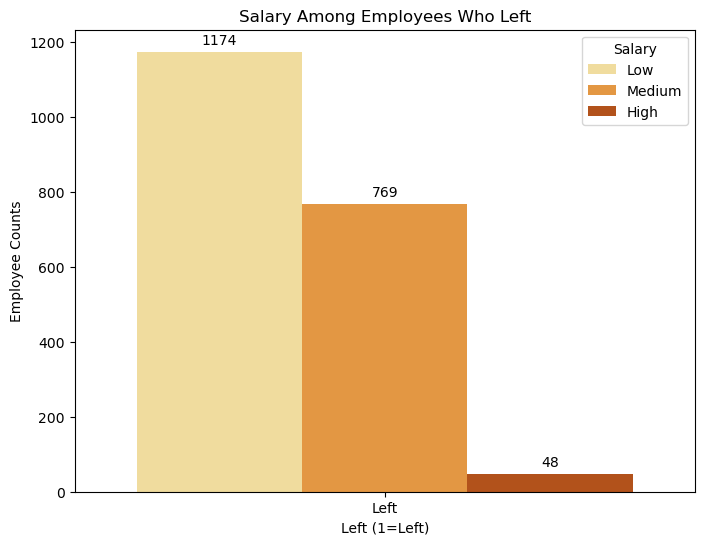

In [53]:
colors_earth = sns.color_palette("YlOrBr", n_colors=3)  # adjusting to 3 colors to match 'Low', 'Medium', 'High'

# Create a plot
plt.figure(figsize=(8, 6))

# Use countplot to get counts of different salaries for employees who left
sns.countplot(data=df[df['left'] == 1], x='left', hue='salary', palette=colors_earth)

plt.title('Salary Among Employees Who Left')
plt.xlabel('Left (1=Left)')
plt.ylabel('Employee Counts')
plt.legend(title='Salary', labels=['Low', 'Medium', 'High'])
plt.xticks([0], ['Left'])  # Adjusted x-tick labels for clarity

# Annotating bars with their respective counts
n = len(plt.gca().patches) // 3  # adjusted the division value to correctly compute 'n'
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2,
                   height + 30,  # slight adjustment here
                   int(height),
                   ha='center',
                   va='center',
                   color='black',  # changed to black for better visibility
                   fontsize=10)
    
plt.show()


C:\Users\Hoyeon Kang\AppData\Local\Temp\ipykernel_208\285005407.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



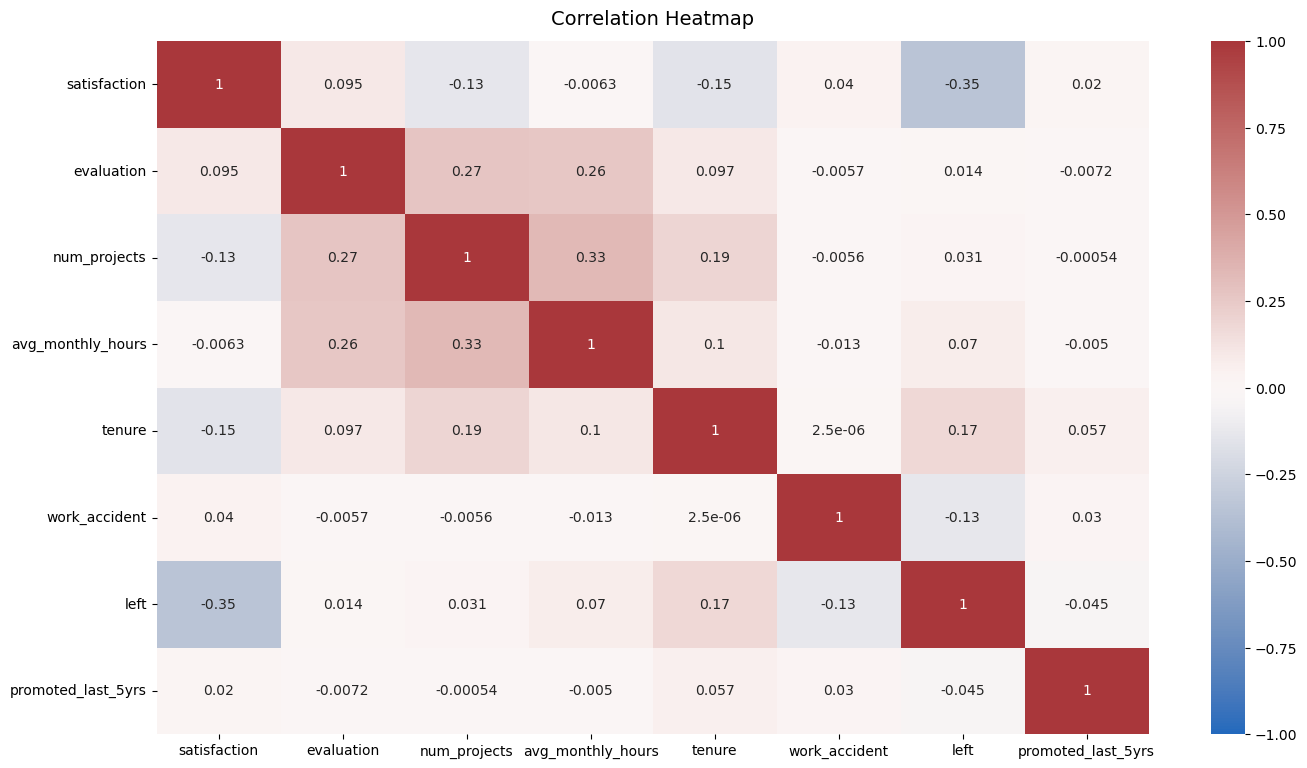

In [55]:
# Create a plot as needed

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

* Satisfaction Level: It is evident that the average satisfaction level of employees who left is lower than that of employees who stayed. Employees who remained with the company generally have satisfaction levels above 0.6, while the group of employees who left is concentrated around a lower satisfaction level of approximately 0.4. The visualizations above suggest that monthly work hours, promotion history, departments, and salary do not have a significant impact on employees' satisfaction levels. However, it is possible that some employees with tenures between 4 and 6 years may exhibit relatively low satisfaction levels, as indicated by the box plots, which are stretched towards the range of 0.2 to 0.3.

* Evaluation: The visualizations above reveal that there is no significant difference in the average evaluation scores between the two distinct groups, although the average score of employees who stayed is slightly lower than that of those who left. However, in the violin plot, it is evident that leavers exhibit a polarized trend in their evaluation scores.

* Number of Projects: The visualizations above reveal that there is no significant difference in the average number of projects between the two distinct groups. Nevertheless, it is evident that employees who remained with the company mostly have 3 to 4 projects, while a majority of employees who left the company had only 2 projects

* Average Monthly Work Hours: Although both groups exhibit a similar mean value in monthly work hours, employees in the 'Stayed' group predominantly work between 125 and 250 hours per month. In contrast, employees in the 'Left' group tend to work either between 125 and 150 hours or between 225 and 300 hours per month.

* Tenure: The average tenure of the 'Left' group is 3.88, whereas the average tenure of the 'Stay' group is 3.26.

* Work Accident: Only 5% of the 'Left' group had a work accident.

* Promotion History: 99.5% of the 'Left' group were not promoted in the past 5 years.

* Departments: In terms of percentages, most departments have a similar 'Left' group percentage of around 17%. However, the 'R&D' and 'Management' departments have approximately 12% of the 'Left' group.

* Salary: Among the 'Left' group, salary distributions are 59% low, 39% medium, and 2% high.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

In [56]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [57]:
multiple_ML_model = LazyClassifier (verbose=0, ignore_warnings=True, predictions=True)

In [58]:
df = pd.get_dummies(df, columns=['department', 'salary'], prefix=['department', 'salary'])
df.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left,promoted_last_5yrs,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
y = df['left']
X = df.drop(['left'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [60]:
model, predictions = multiple_ML_model.fit(X_train, X_test, y_train, y_test)

 34%|███▍      | 10/29 [00:01<00:03,  5.91it/s]  File "C:\Users\Hoyeon Kang\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 29/29 [00:16<00:00,  1.77it/s]

[LightGBM] [Info] Number of positive: 1493, number of negative: 7500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 8993, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166018 -> initscore=-1.614116
[LightGBM] [Info] Start training from score -1.614116


In [61]:
model

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.96,0.96,0.98,0.17
BaggingClassifier,0.98,0.96,0.96,0.98,0.25
XGBClassifier,0.98,0.96,0.96,0.98,0.14
RandomForestClassifier,0.99,0.96,0.96,0.99,0.80
DecisionTreeClassifier,0.97,0.95,0.95,0.97,0.04
ExtraTreesClassifier,0.98,0.95,0.95,0.98,0.72
AdaBoostClassifier,0.96,0.93,0.93,0.96,0.38
LabelSpreading,0.95,0.93,0.93,0.95,5.73
LabelPropagation,0.95,0.93,0.93,0.95,5.27


### Modeling

Add as many cells as you need to conduct the modeling process.

In [62]:
### YOUR CODE HERE ###

In [63]:
df.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left,promoted_last_5yrs,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
## RandomForestClassifier

In [79]:
# Splitting the data into training and testing sets
y = df['left']
X = df.drop(['left'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid for GridSearchCV
cv_params = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}

# Define the scoring metrics as a list of strings
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Specify the scoring metric to use for model selection (e.g., 'f1')
refit_metric = 'f1'

# Create the GridSearchCV object
rf_model = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit=refit_metric)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [81]:
#Check the parameters of the best-performing model

rf_model.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [82]:
# Check the best score

rf_model.best_score_

0.9474488970210523

In [83]:
# apply the best params into the model

rf_opt = RandomForestClassifier(max_depth = 7, min_samples_leaf = 1,
                                min_samples_split = 2, max_features=1.0,
                                max_samples = 0.7, n_estimators = 100, random_state = 0)
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=0)

In [88]:
# Predict on test set

y_pred_rf = rf_opt.predict(X_test)

In [124]:
# Get 5 evaluation scores.

print('F1 score of RF model: ', f1_score(y_test, y_pred_rf))
print('Recall score of RF model: ', recall_score(y_test, y_pred_rf))
print('Precision score of RF model: ', precision_score(y_test, y_pred_rf))
print('Accuracy score of RF model: ', accuracy_score(y_test, y_pred_rf))
print('AUC score of RF model: ', roc_auc_score(y_test, y_pred_rf))

F1 score of RF model:  0.9565217391304347
Recall score of RF model:  0.927710843373494
Precision score of RF model:  0.9871794871794872
Accuracy score of RF model:  0.9859906604402935
AUC score of RF model:  0.9626554216867471


In [95]:
## XGBClassifier

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [116]:
# Choose the hyperparameters

xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }
scoring = ['accuracy', 'precision', 'recall', 'f1']   
xgb_model = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [118]:
xgb_model.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [7, 9],
                         'min_child_weight': [3, 5], 'n_estimators': [100],
                         'subsample': [1.0]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [119]:
xgb_model.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [120]:
xgb_model.best_score_

0.944669646880887

In [121]:
# Predict on the test data

y_pred_xgb = xgb_model.predict(X_test)

In [125]:
# Get 5 evaluation scores.

print('F1 score of XGB model: ', f1_score(y_test, y_pred_xgb))
print('Recall score of XGB model: ', recall_score(y_test, y_pred_xgb))
print('Precision score of XGB model: ', precision_score(y_test, y_pred_xgb))
print('Accuracy score of XGB model: ', accuracy_score(y_test, y_pred_xgb))
print('AUC score of XGB model: ', roc_auc_score(y_test, y_pred_xgb))

F1 score of XGB model:  0.9505154639175257
Recall score of XGB model:  0.9257028112449799
Precision score of XGB model:  0.9766949152542372
Accuracy score of XGB model:  0.9839893262174784
AUC score of XGB model:  0.96065140562249


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [127]:
print('F1 score of RF model: ', f1_score(y_test, y_pred_rf))
print('Recall score of RF model: ', recall_score(y_test, y_pred_rf))
print('Precision score of RF model: ', precision_score(y_test, y_pred_rf))
print('Accuracy score of RF model: ', accuracy_score(y_test, y_pred_rf))
print('AUC score of RF model: ', roc_auc_score(y_test, y_pred_rf))

F1 score of RF model:  0.9565217391304347
Recall score of RF model:  0.927710843373494
Precision score of RF model:  0.9871794871794872
Accuracy score of RF model:  0.9859906604402935
AUC score of RF model:  0.9626554216867471


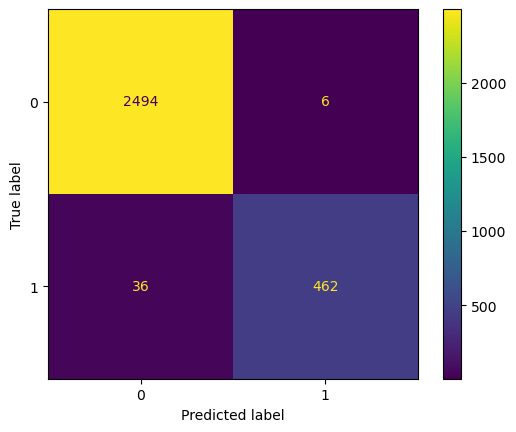

In [140]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_opt.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)

disp.plot()

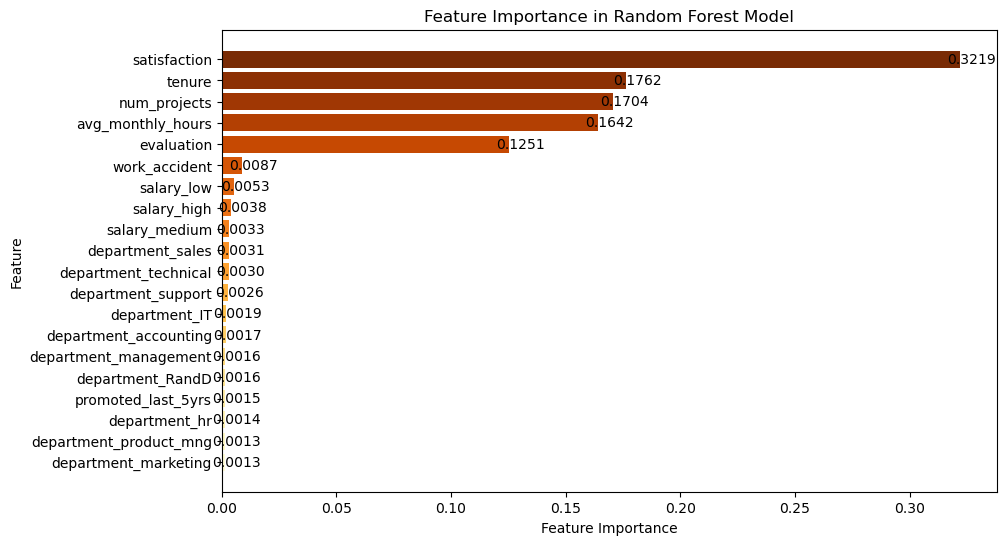

In [141]:
indices = np.argsort(importances)[::-1]
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

earth_palette = sns.color_palette("YlOrBr", n_colors=len(sorted_features))[::-1]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importances, color=earth_palette)

for bar, imp in zip(bars, sorted_importances):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{imp:.4f}', ha='center', va='center')

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # y축을 내림차순으로 변경
plt.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Answers

* Based on the analysis of the feature importances in the Random Forest model, it appears that the following features are important in predicting employee attrition:
    1. Satisfaction Level (satisfaction)
    2. Tenure (tenure)
    3. Number of Projects (num_projects)
    4. Average Monthly Hours (avg_monthly_hours)
    5. Last Evaluation (evaluation)

* The above features have higher importances in predicting whether an employee will leave the company or not. It suggests that factors related to employee satisfaction, work tenure, workload (number of projects and average monthly hours), and performance evaluation play a significant role in determining employee attrition. It's important for the company to focus on these aspects to potentially reduce attrition rates and improve employee retention.

* f the company aims to reduce the number of employees leaving the company, it should prioritize and focus on the most important features mentioned above.

* The model fits the dataset well, achieving a score of 0.9474488970210523.

* As mentioned earlier, even though both groups show similar average values in most of the features, the company should focus on identifying different patterns and trends. For example, the average values of evaluation, number of projects, and average monthly work hours are similar, but each group exhibits a different shape in the chart. Additionally, it can be observed that employees with a tenure of 4 to 6 years have relatively low minimum (MIN) values in satisfaction levels compared to other groups.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Answers

* F1 score RF model:  0.9565217391304347
* Recall score RF model:  0.927710843373494
* Precision score RF model:  0.9871794871794872
* Accuracy score RF model:  0.9859906604402935
* AUC score RF model:  0.9626554216867471

### Summary of model results

RF model score is 0.9474488970210523.

### Conclusion, Recommendations, Next Steps

    To reduce employee turnover, the company should prioritize managing the key features identified as important in the analysis: satisfaction, tenure, number of projects, average monthly work hours, and evaluation. This could involve reviewing current policies, listening to employee feedback, and implementing improvements.

    Additionally, it's crucial to recognize nuanced patterns within each feature among two seemingly similar groups. For example, although average values for evaluation, number of projects, and average monthly work hours appear similar, closer examination reveals distinct trends within each group. 
    
    For example, employees with a tenure of 4 to 6 years exhibit lower satisfaction levels compared to other groups, suggesting the need for targeted engagement strategies. Furthermore, the company should scrutinize its promotion history, ensuring transparency and equal opportunities for all employees. By addressing these areas, the company can work towards reducing employee turnover and fostering a more positive work environment.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.